###### Importing required libraries

In [1]:
import pandas as pd
#Since our dataset has many columns, code to display all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Reading and analysis of dataset

In [2]:
#Reading the dataset
house = pd.read_csv(r'train.csv')

In [3]:
#Look at dataset once
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Looking at the info of data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

###  Missing value treatment

In [5]:
#Dropping the rows which is having more than 30% of missing values , means out of 81 columns data should be present in atleast 55 columns
house.dropna(thresh=56,inplace=True)

In [6]:
#Listing out the columns that have more than 80% of missing data
for i in list(house.columns):
    if (len(house[house[i].isna()])/len(house) *100) > 80:
        print(i,(len(house[house[i].isna()])/len(house) *100))

Alley 93.76712328767123
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


In [7]:
#Deleting the columns that have more than 80% of missing data
house.drop(columns=(['Alley','PoolQC','MiscFeature','Fence']),axis=1,inplace=True)

In [8]:
#Code to get percentage of missing values if column has any any
x = []
for i in list(house.columns):
    if (len(house[house[i].isna()])/len(house) *100) > 0:
        print(i,(len(house[house[i].isna()])/len(house) *100))
        x.append(i)

LotFrontage 17.73972602739726
MasVnrType 0.547945205479452
MasVnrArea 0.547945205479452
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinType2 2.6027397260273974
Electrical 0.0684931506849315
FireplaceQu 47.26027397260274
GarageType 5.5479452054794525
GarageYrBlt 5.5479452054794525
GarageFinish 5.5479452054794525
GarageQual 5.5479452054794525
GarageCond 5.5479452054794525


Hence the above coloums are having the missing values. Now we will try to impute the missing values by some plots or some statical methods etc..

Text(0.5, 0, 'GarageType')

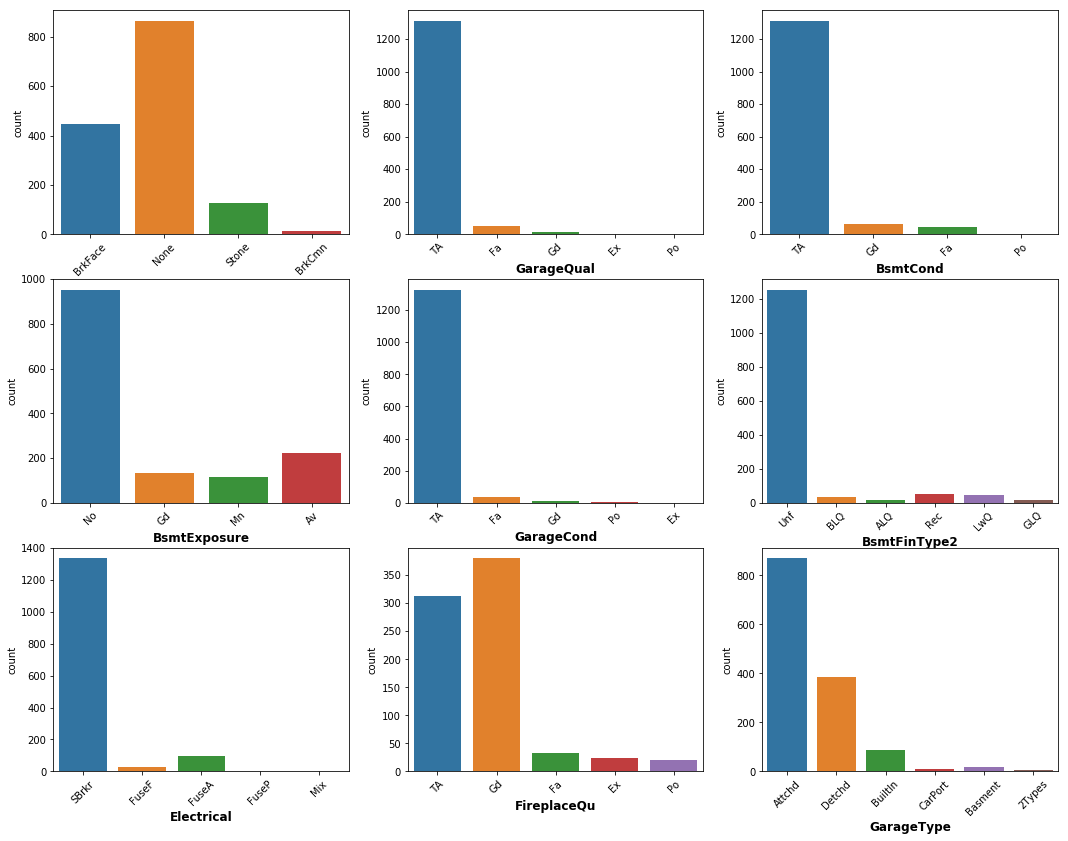

In [9]:
#Looking at the count plot of catogerical varibles that are having missing values.
fig = plt.figure(figsize=(18,14))
plt.subplot(331)
ax = sns.countplot(x='MasVnrType',data=house)
plt.xticks(rotation=45)
plt.xlabel('MasVnrType',fontsize=12,fontweight='bold')
plt.subplot(332)
ax = sns.countplot(x='GarageQual',data=house)
plt.xticks(rotation=45)
plt.xlabel('GarageQual',fontsize=12,fontweight='bold')
plt.subplot(333)
ax = sns.countplot(x='BsmtCond',data=house)
plt.xticks(rotation=45)
plt.xlabel('BsmtCond',fontsize=12,fontweight='bold')
plt.subplot(334)
ax = sns.countplot(x='BsmtExposure',data=house)
plt.xticks(rotation=45)
plt.xlabel('BsmtExposure',fontsize=12,fontweight='bold')
plt.subplot(335)
ax = sns.countplot(x='GarageCond',data=house)
plt.xticks(rotation=45)
plt.xlabel('GarageCond',fontsize=12,fontweight='bold')
plt.subplot(336)
ax = sns.countplot(x='BsmtFinType2',data=house)
plt.xticks(rotation=45)
plt.xlabel('BsmtFinType2',fontsize=12,fontweight='bold')
plt.subplot(337)
ax = sns.countplot(x='Electrical',data=house)
plt.xticks(rotation=45)
plt.xlabel('Electrical',fontsize=12,fontweight='bold')
plt.subplot(338)
ax = sns.countplot(x='FireplaceQu',data=house)
plt.xticks(rotation=45)
plt.xlabel('FireplaceQu',fontsize=12,fontweight='bold')
plt.subplot(339)
ax = sns.countplot(x='GarageType',data=house)
plt.xticks(rotation=45)
plt.xlabel('GarageType',fontsize=12,fontweight='bold')

In [10]:
#Imputing nan values with highest values of corrosponding columns
house['MasVnrType'].fillna('None',inplace=True)
house['GarageQual'].fillna('TA',inplace=True)
house['BsmtCond'].fillna('TA',inplace=True)
house['BsmtExposure'].fillna('No',inplace=True)
house['GarageCond'].fillna('TA',inplace=True)
house['BsmtFinType2'].fillna('Unf',inplace=True)
house['Electrical'].fillna('SBrkr',inplace=True)
house['GarageFinish'].fillna('Unf',inplace=True)
house['GarageType'].fillna('Attchd',inplace=True)

In [11]:
#Haning a look at the continous columns missing columns
x = ['LotFrontage','MasVnrArea','GarageYrBlt']
house[x].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [12]:
#Since MasVnrType and MasVnrArea is dependent looking for MasVnrType values for MasVnrArea is missing
house[house.MasVnrArea.isna()]['MasVnrType'].value_counts()

None    8
Name: MasVnrType, dtype: int64

Here the `MasVnrType` is *None* for all the missing values of `MasVnrArea` hence checking the `MasVnrArea` values for which `MasVnrType` is none and then imputing it for missing values

In [13]:
#Since all are none and MasVnrArea for none is 0.0 imputing it with 0.0
print(house[house.MasVnrType == 'None']['MasVnrArea'].value_counts())
#0.0 is mode for None hence replacing it 0.0 for missing values
house['MasVnrArea'].fillna(0.0,inplace=True)

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64


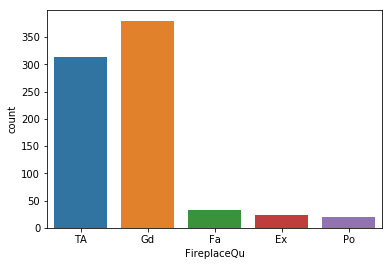

In [14]:
#Countplot for `FireplaceQu`
sns.countplot(x='FireplaceQu',data=house)

In [15]:
#Since 47% of values are missing and also for existing data TA and GD have appx same distibution hence it is better to delete column
house.drop(columns=(['FireplaceQu']),axis=1,inplace=True)

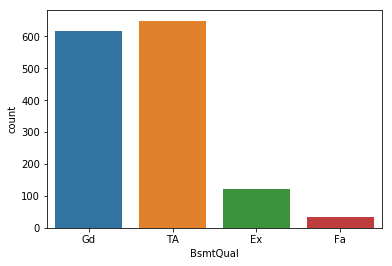

In [16]:
#Countplot for 'BsmtQual'
sns.countplot(x='BsmtQual',data=house)

In [17]:
#Value count for `BsmtQual before imputing
print('Value count for BsmtQual before imputing')
print(house['BsmtQual'].value_counts())
#here TA and Gd are having equal importance hence randomnly filling for missing values
house['BsmtQual'] = house['BsmtQual'].fillna(pd.Series(np.random.choice(['TA','Gd'],size=len(house.index))))
print('Value count for BsmtQual after imputing')
print(house['BsmtQual'].value_counts())
print('Overall distribution for value count remain same before and after imputing')

Value count for BsmtQual before imputing
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Value count for BsmtQual after imputing
TA    665
Gd    639
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Overall distribution for value count remain same before and after imputing


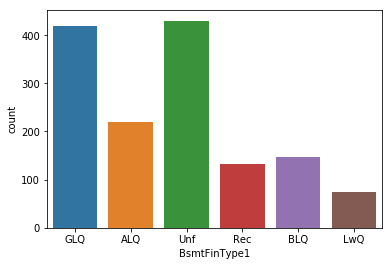

In [18]:
#Countplot for 'BsmtFinType1'
sns.countplot(x='BsmtFinType1',data=house)

In [19]:
#Value count
print('Value count for BsmtFinType1 before imputing the values')
print(house['BsmtFinType1'].value_counts())
#here TA and Gd are having equal importance hence randomnly filling the data
house['BsmtFinType1'] = house['BsmtFinType1'].fillna(pd.Series(np.random.choice(['Unf','GLQ'],size=len(house.index))))
print('Value count for BsmtFinType1 after imputing the data')
print(house['BsmtFinType1'].value_counts())
print('Staticis remain same before and after imputing')

Value count for BsmtFinType1 before imputing the values
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Value count for BsmtFinType1 after imputing the data
Unf    448
GLQ    437
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Staticis remain same before and after imputing


In [20]:
#Checking the stats for LotFrontage
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [21]:
#Since mean and median are almost same i.e., 70 we can impute LotFrontage nan values with Mean
house['LotFrontage'].fillna(house['LotFrontage'].mean(),inplace=True)

In [22]:
# For GarageYrBlt this coloum is highly corelated with YearBuilt hence we would any how igonre this coloum
#so instead of imputing values deleting this coloum on high corelation bases
print(house.corr())
#Deleting 'GarageYrBlt' on high corelation bases
house.drop(columns=('GarageYrBlt'),inplace=True)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365     0.012609  -0.012713     -0.021998   -0.051071   -0.005024   -0.005968  -0.007940    -0.015415  0.010496  0.005590     -0.044230   0.008273      0.002289     -0.020155  0.005587  0.006784      0.037719      0.002951      0.027239   -0.019772     0.000072    0.016570    0.017634   -0.029643    -0.000477       0.002889  -0.046635     0.001330  0.057044 -0.006242  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.357056 -0.139781    

In [23]:
#All the missing values are imputed
round(100*(house.isnull().sum()/len(house.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

###### Outlier Ananlysis

In [24]:
#Percentile description
house.describe(percentiles=[.25,.5,.75,.8,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,1168.200000,80.000000,80.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797

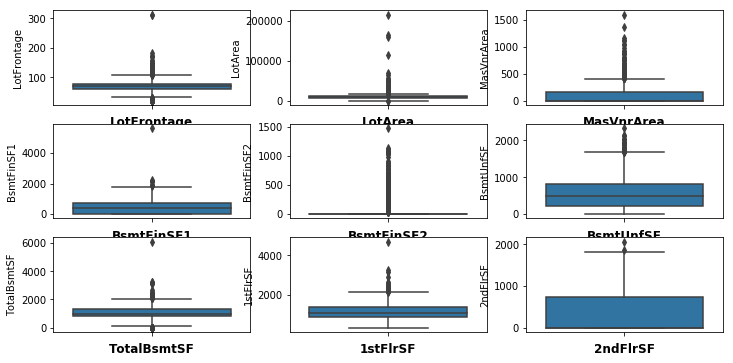

In [25]:
#Below are the columns that looks like it is having Outlier values hence below is code to have box-plot for visuval analysis
x = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']
a = 431
plt.figure(figsize=(12,8))
for i in x:
    plt.subplot(a)
    ax = sns.boxplot(x=i,data=house,orient='v')
    plt.xlabel(i,fontsize=12,fontweight='bold')
    a += 1

For below coloumns since 95% of data is 0.0 it is better to delete these coloums as this will not make any sense in analysis

`EnclosedPorch`,`3SsnPorch`,`ScreenPorch`,`PoolArea`,`MiscVal`,`LowQualFinSF`,`BsmtFinSF2`

In [26]:
#Deleting the above columns as it have 95% of same values
house.drop(columns=(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','LowQualFinSF','BsmtFinSF2']),inplace=True)

In [27]:
#Creating a function to remove outlier from the given coloum
def remove(dataframe,column,percentile):
    q = dataframe[column].quantile(percentile)
    dataframe=dataframe[dataframe[column]<=q]
    return dataframe
#Creating function to draw boxplot for the given coloum
def plot(dataframe,column):
    return sns.boxplot(column,data=dataframe,orient='v')

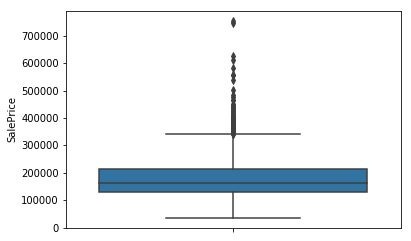

In [28]:
#Outlier for Saleprice
plot(house,'SalePrice')

In [29]:
#Removing the outlier above 99 percentile
house = remove(house,'SalePrice',.99)

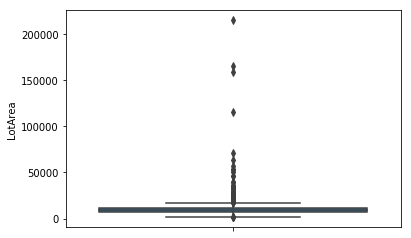

In [30]:
#Outlier analysis for Lot Area
plot(house,'LotArea')

In [31]:
#Removing the outliers in LotArea that are above 95 percentile
house = remove(house,'LotArea',.95)

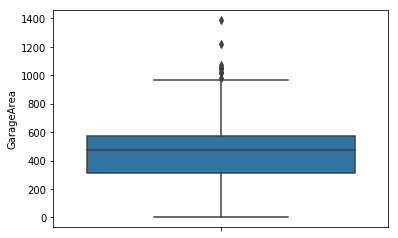

In [32]:
#Box plot for GarageArea
plot(house,'GarageArea')

In [33]:
#Removing the outliers in GarageArea that are above 99 percentile
house = remove(house,'GarageArea',.99)

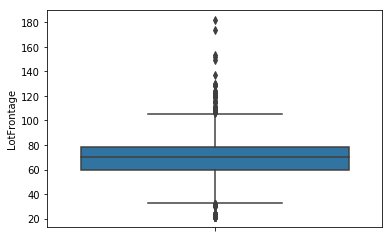

In [34]:
#box Plot for LotFrontage
plot(house,'LotFrontage')

In [35]:
#Removing the outliers in LotFrontage that are above 95 percentile
house = remove(house,'LotFrontage',.95)

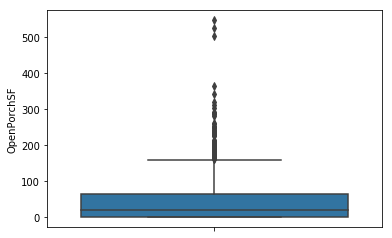

In [36]:
#Boxplot for OpenPorchSF
plot(house,'OpenPorchSF')

In [37]:
#Removing the outliers in OpenPorchSF that are above 95 percentile
house=remove(house,'OpenPorchSF',.95)

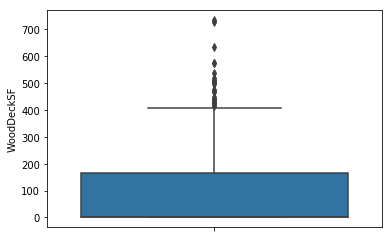

In [38]:
#BoxPlot for WoodDeckSF
plot(house,'WoodDeckSF')

In [39]:
#Removing the outliers in WoodDeckSF that are above 97 percentile
house=remove(house,'WoodDeckSF',0.97)

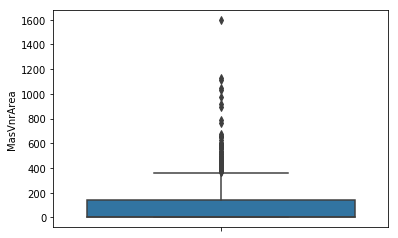

In [40]:
#Box plot for MasVnrArea
plot(house,'MasVnrArea')

In [41]:
#Removing the outliers in MasVnrArea that are above 97 percentile
house=remove(house,'MasVnrArea',.97)

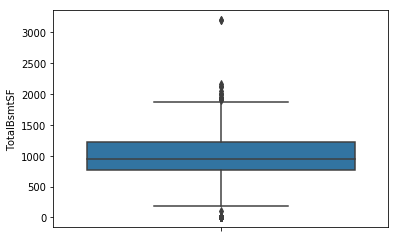

In [42]:
#Boxplot for TotalBsmtSF
plot(house,'TotalBsmtSF')

In [43]:
#Removing the outliers in TotalBsmtSF that are above 97 percentile
house = remove(house,'TotalBsmtSF',0.97)

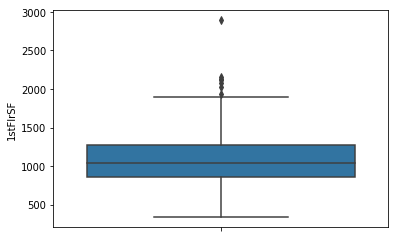

In [44]:
#Box Plot for 1stFlrSF
plot(house,'1stFlrSF')

In [45]:
#Removing the outliers in 1stFlrSF that are above 97 percentile
house= remove(house,'1stFlrSF',.97)

In [46]:
#All the outlier treatment is done
house.describe(percentiles=[.25,.5,.75,.8,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,736.328111,58.677419,64.979855,8688.234101,5.873733,5.618433,1968.874654,1983.263594,66.792627,388.055300,530.464516,955.810138,1060.094009,322.018433,1386.669124,0.388018,0.054378,1.478341,0.359447,2.794470,1.044240,6.208295,0.495853,1.642396,432.669124,75.067281,31.421198,6.285714,2007.826728,160471.701382
std,417.307155,43.569166,15.242881,2960.329031,1.237372,1.111841,30.413402,21.089788,110.804540,376.886008,397.914450,332.084772,280.082889,402.141873,417.056637,0.504266,0.234858,0.524968,0.498906,0.767878,0.218761,1.442286,0.602295,0.713115,191.638517,96.989710,41.896601,2.657134,1.324418,54837.440399
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,386.000000,20.000000,60.000000,7153.000000,5.000000,5.000000,1950.000000,1964.000000,0.000000,0.000000,208.000000,768.000000,854.000000,0.000000,1072.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,299.000000,0.000000,0.000000,5.000000,2007.000000,124500.000000
50%,740.000000,50.000000,70.000000,8834.000000,6.000000,5.000000,1971.000000,1991.000000,0.000000,351.000000,460.000000,932.000000,1021.000000,0.000000,1349.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,2.000000,441.000000,0.000000,0.000000,6.000000,2008.000000,149900.000000
75%,1094.000000,70.000000,73.000000,10463.000000,7.000000,6.000000,1999.000000,2003.000000,110.000000,659.000000,776.000000,1164.000000,1247.000000,701.000000,1640.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,544.000000,144.000000,52.000000,8.000000,2009.000000,188700.000000
80%,1160.200000,80.000000,76.000000,10949.200000,7.000000,7.000000,2002.000000,2004.000000,153.200000,713.200000,846.000000,1235.400000,1314.000000,755.000000,1692.400000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,63.000000,8.000000,2009.000000,200180.000000
95%,1389.600000,160.000000,87.800000,13593.600000,8.000000,8.000000,2006.000000,2007.000000,319.600000,1070.800000,1342.000000,1502.000000,1583.200000,1036.000000,2183.800000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,3.000000,766.000000,264.800000,120.800000,11.000000,2010.000000,266900.000000
99%,1444.160000,190.000000,95.000000,15618.840000,8.000000,9.000000,2009.000000,2009.000000,435.480000,1353.880000,1584.640000,1649.160000,1680.000000,1290.880000,2557.200000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,10.000000,2.000000,3.000000,878.960000,340.320000,155.160000,12.000000,2010.000000,325099.840000


### Data prepration

###### One hot encoding

In [47]:
#looking for the column that are having only 2 values in it so that we can use Binary encoding
x = house.columns
for i in x:
    if len(list(house[i].value_counts())) <= 2:
        print(i,'->',list(house[i].value_counts()))

Street -> [1083, 2]
Utilities -> [1085]
CentralAir -> [1008, 77]


here Below coloums have only 2 values in it so we can use binary encoding

`Street` : 'Grvl','Pave' 

`CentralAir`: 'N' ,' Y'

And `Utilities` has same values across the column

In [48]:
#As per the above code output 'Utilities' has same value hence deleting the coloum
house.drop(columns='Utilities',inplace=True)

In [49]:
#Using binary encoding for Street
house['Street'] = house['Street'].replace({'Grvl':1,'Pave':0})
#Changing the datatype to int
house['Street'] = house['Street'].astype('int')
#Using Binary encoding for CentralAir
house['CentralAir'] = house['CentralAir'].replace({'N':0,'Y':1})
#changing the datatype to int
house['CentralAir'] = house['CentralAir'].astype('int')

In [50]:
#Code to see if at all any columns is present that has 90% of same value and only 10% of data have differnet value
#Performing this activity so that binary encoding concept can be used in these columns
x = house.columns
for i in x:
    if list(house[i].value_counts())[0]/len(house.index)*100 > 90:
        print(i,'->',list(house[i].value_counts())[0]/len(house.index)*100)

Street -> 99.81566820276497
LandContour -> 91.33640552995391
LandSlope -> 96.12903225806451
Condition2 -> 99.2626728110599
RoofMatl -> 99.53917050691244
BsmtCond -> 92.44239631336406
Heating -> 97.6036866359447
CentralAir -> 92.90322580645162
BsmtHalfBath -> 94.74654377880184
KitchenAbvGr -> 95.57603686635944
Functional -> 93.45622119815668
GarageQual -> 94.74654377880184
GarageCond -> 95.85253456221197
PavedDrive -> 90.96774193548387


In [51]:
#Printing the unique value
print(house['LandContour'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['LandContour'] = house['LandContour'].replace({'Lvl':1,'Bnk':0,'HLS':0,'Low':0})
#Changing the data type to int
house['LandContour'] = house['LandContour'].astype('int')

Lvl    991
Bnk     48
HLS     31
Low     15
Name: LandContour, dtype: int64


In [52]:
#Printing the unique value
print(house['LandSlope'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['LandSlope'] = house['LandSlope'].replace({'Gtl':1,'Mod':0,'Sev':0})
#Changing the data type to int
house['LandSlope'] = house['LandSlope'].astype('int')

Gtl    1043
Mod      39
Sev       3
Name: LandSlope, dtype: int64


In [53]:
#Printing the unique value
print(house['Condition2'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['Condition2'] = house['Condition2'].replace({'Norm':1,'Feedr':0,'RRNn':0,'Artery':0,'RRAn':0})
#Changing the data type to int
house['Condition2'] = house['Condition2'].astype('int')

Norm      1077
Feedr        4
RRNn         2
RRAn         1
Artery       1
Name: Condition2, dtype: int64


In [54]:
#Printing the unique value
print(house['RoofMatl'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['RoofMatl'] = house['RoofMatl'].replace({'CompShg':1,'Tar&Grv':0,'WdShake':0,'WdShngl':0})
#Changing the data type to int
house['RoofMatl'] = house['RoofMatl'].astype('int')

CompShg    1080
Tar&Grv       3
WdShngl       1
WdShake       1
Name: RoofMatl, dtype: int64


In [55]:
#Printing the unique value
print(house['BsmtCond'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['BsmtCond'] = house['BsmtCond'].replace({'TA':1,'Gd':0,'Fa':0,'Po':0})
#Changing the data type to int
house['BsmtCond'] = house['BsmtCond'].astype('int')

TA    1003
Gd      44
Fa      36
Po       2
Name: BsmtCond, dtype: int64


In [56]:
#Printing the unique value
print(house['Heating'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['Heating'] = house['Heating'].replace({'GasA':1,'GasW':0,'Grav':0,'Wall':0,'OthW':0,'Floor':0})
#Changing the data type to int
house['Heating'] = house['Heating'].astype('int')

GasA     1059
GasW       13
Grav        6
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [57]:
#Printing the unique value
print(house['Functional'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['Functional'] = house['Functional'].replace({'Typ':1,'Min2':0,'Min1':0,'Maj1':0,'Mod':0,'Maj2':0})
#Changing the data type to int
house['Functional'] = house['Functional'].astype('int')

Typ     1014
Min2      26
Min1      23
Maj1      10
Mod        8
Maj2       4
Name: Functional, dtype: int64


In [58]:
#Printing the unique value
print(house['GarageQual'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['GarageQual'] = house['GarageQual'].replace({'TA':1,'Fa':0,'Gd':0,'Po':0,'Ex':0})
#Changing the data type to int
house['GarageQual'] = house['GarageQual'].astype('int')

TA    1028
Fa      44
Gd       8
Po       3
Ex       2
Name: GarageQual, dtype: int64


In [59]:
#Printing the unique value
print(house['GarageCond'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['GarageCond'] = house['GarageCond'].replace({'TA':1,'Fa':0,'Po':0,'Gd':0,'Ex':0})
#Changing the data type to int
house['GarageCond'] = house['GarageCond'].astype('int')

TA    1040
Fa      31
Po       7
Gd       5
Ex       2
Name: GarageCond, dtype: int64


In [60]:
#Printing the unique value
print(house['PavedDrive'].value_counts())
#Using binary encoding so that 90% of data is replaced by 1 and rest all by 0
house['PavedDrive'] = house['PavedDrive'].replace({'Y':1,'N':0,'P':0})
#Changing the data type to int
house['PavedDrive'] = house['PavedDrive'].astype('int')

Y    987
N     74
P     24
Name: PavedDrive, dtype: int64


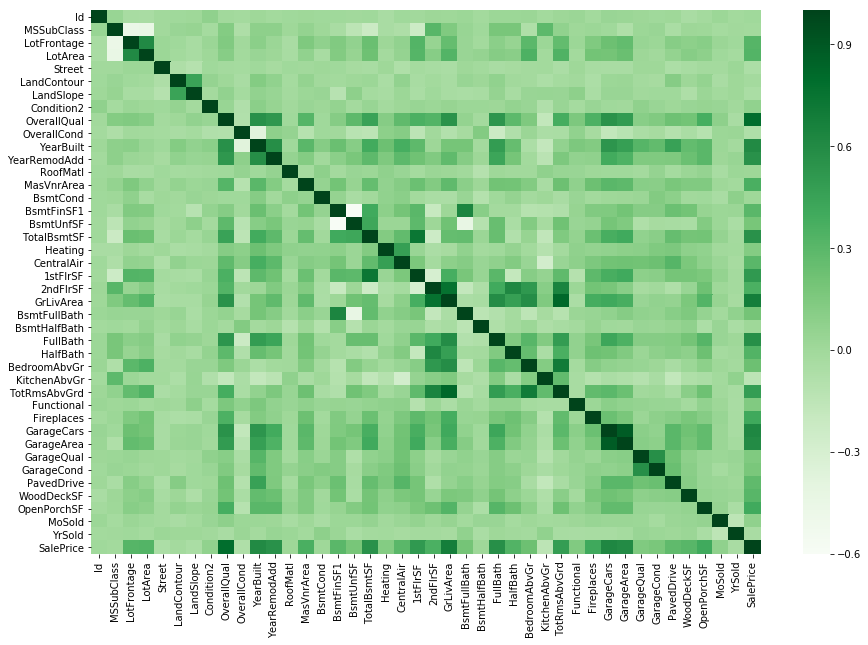

In [61]:
#Corealtion graph to see any co-related columns
plt.figure(figsize=(15,10))
sns.heatmap(house.corr(),cmap='Greens')

In [62]:
#Code to print the top corelated variables
c = house.corr().abs().unstack()
c.sort_values(ascending=False)

SalePrice     SalePrice       1.000000
1stFlrSF      1stFlrSF        1.000000
GrLivArea     GrLivArea       1.000000
BsmtFullBath  BsmtFullBath    1.000000
BsmtHalfBath  BsmtHalfBath    1.000000
FullBath      FullBath        1.000000
HalfBath      HalfBath        1.000000
BedroomAbvGr  BedroomAbvGr    1.000000
KitchenAbvGr  KitchenAbvGr    1.000000
TotRmsAbvGrd  TotRmsAbvGrd    1.000000
Functional    Functional      1.000000
Fireplaces    Fireplaces      1.000000
GarageCars    GarageCars      1.000000
GarageArea    GarageArea      1.000000
GarageQual    GarageQual      1.000000
GarageCond    GarageCond      1.000000
PavedDrive    PavedDrive      1.000000
WoodDeckSF    WoodDeckSF      1.000000
OpenPorchSF   OpenPorchSF     1.000000
2ndFlrSF      2ndFlrSF        1.000000
CentralAir    CentralAir      1.000000
YrSold        YrSold          1.000000
Heating       Heating         1.000000
MSSubClass    MSSubClass      1.000000
LotFrontage   LotFrontage     1.000000
LotArea       LotArea    

Here follwing are the coloumns that are having high corealtion
-------------------
GarageArea    GarageCars      0.879046

TotRmsAbvGrd  GrLivArea       0.818910

2ndFlrSF      GrLivArea       0.764160

TotalBsmtSF   1stFlrSF        0.731674


In [63]:
#Deleting the coloumns that are having high corelation
house.drop(columns={'GarageCars','GrLivArea','1stFlrSF'},axis=1,inplace=True)

In [64]:
#Selecting the columns that are having dtype = Object
catogerical = house.select_dtypes(include=['object'])

In [65]:
#One peice of code that does dummy encoding, deleting one coloum in dummy, mergering dummies with actual dataset and then deleting the original coloum from the dataset
for i in catogerical.columns:
    dummy = pd.get_dummies(house[i], prefix=i,drop_first=True)
    house = pd.concat([house,dummy], axis=1)
    house = house.drop(columns=i,axis=1)

### Train test split

In [66]:
#Sepreating the perdector column "SalePrice"
predictor = house['SalePrice']
predictor = pd.DataFrame(data=predictor)
#All other coloums other than Predictor
variables = house.drop(columns=(['SalePrice','Id']),axis=1)

In [67]:
#Train Test split
x_train,x_test,y_train,y_test = train_test_split(variables,predictor,train_size=0.7,random_state=100)

In [68]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,Street,LandContour,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,BsmtCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1091,160,24.0,2160,0,1,1,1,7,5,1999,2000,1,212.0,1,510,90,600,1,1,628,1,0,2,1,2,1,4,1,0,462,1,1,1,0,48,3,2008,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1176,20,37.0,6951,0,1,1,1,5,5,1984,1985,1,0.0,1,658,218,876,1,1,0,1,0,1,0,3,1,5,1,0,264,1,1,1,362,0,10,2008,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1349,70,50.0,5250,0,1,1,1,8,5,1872,1987,1,0.0,0,259,425,684,0,0,1215,0,0,2,0,4,1,8,1,0,0,1,1,1,0,54,12,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [69]:
#Statics of x_train
x_train.describe()

,MSSubClass,LotFrontage,LotArea,Street,LandContour,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,BsmtCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.00000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.00000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.00000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.00000,759.000000,759.000000,759.000000

In [70]:
#Here since most of the coloums are between 0 to 1 lisitng out the coloums that doesnt fall in this range
cols = []
for i in list(x_train.columns):
    if x_train[i].max() > 1:
        print(i,x_train[i].max())
        cols.append(i)

MSSubClass 190
LotFrontage 99.0
LotArea 17043
OverallQual 9
OverallCond 9
YearBuilt 2009
YearRemodAdd 2010
MasVnrArea 468.0
BsmtFinSF1 1567
BsmtUnfSF 1694
TotalBsmtSF 1694
2ndFlrSF 1611
BsmtFullBath 3
BsmtHalfBath 2
FullBath 3
HalfBath 2
BedroomAbvGr 8
KitchenAbvGr 3
TotRmsAbvGrd 14
Fireplaces 3
GarageArea 936
WoodDeckSF 362
OpenPorchSF 166
MoSold 12
YrSold 2010


In [71]:
#Using minmax Scaler since most of values lies between 0 and 1 and MinMaxScaler is able to achive this for non-scaled columns
scaler = MinMaxScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])

C:\Users\sumee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [72]:
x_test[cols] = scaler.transform(x_test[cols])

### Model Bulding

###### Model 1

In [73]:
#Adding the constant to x_train
x_train = sm.add_constant(x_train)
#Bulding 1st model using statsmodel.api OLS with all the features included
lr = sm.OLS(y_train,x_train)
model1 = lr.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     45.09
Date:                Fri, 20 Sep 2019   Prob (F-statistic):          2.48e-255
Time:                        22:29:27   Log-Likelihood:                -8304.8
No. Observations:                 759   AIC:                         1.697e+04
Df Residuals:                     577   BIC:                         1.782e+04
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.232e+04   3.65e+04     -2.257      0.024   -1.54e+05   -1.07e+04
MSSubClass             -189.5090   1.46e+04     -0.013      0.990   -2.89e+04    2.85e+04
LotFrontage            8194.0832   5355.831      1.530      0.127   -2325.218    1.87e+04
LotArea                3.636e+04   6024.356      6.036      0.000    2.45e+04    4.82e+04
Street                -8593.2666   1.41e+04     -0.608      0.543   -3.63e+04    1.92e+04
LandContour           -3244.1330   2825.897     -1.148      0.251   -8794.432    2306.166
LandSlope             -6366.0359   4085.987     -1.558      0.120   -1.44e+04    1659.185
Condition2             8638.4039   7985.017      1.082      0.280   -7044.839    2.43e+04
OverallQual            6.177e+04   8003.711      7.718      0.000     4.6e+04    7.75e+04
OverallCond            2.575e+04   5622.503      4.580      0.000    1.47e+04    3.68e+04
YearBuilt              4.375e+04   9230.930      4.739      0.000    2.56e+04    6.19e+04
YearRemodAdd           1.066e+04   3032.831      3.514      0.000    4701.832    1.66e+04
RoofMatl               2.111e+04    1.5e+04      1.412      0.159   -8261.974    5.05e+04
MasVnrArea            -2086.0325   4921.267     -0.424      0.672   -1.18e+04    7579.749
BsmtCond               -200.8458   2820.904     -0.071      0.943   -5741.337    5339.645
BsmtFinSF1              874.9142   1.32e+04      0.066      0.947   -2.51e+04    2.69e+04
BsmtUnfSF              -2.35e+04   1.48e+04     -1.585      0.114   -5.26e+04    5620.732
TotalBsmtSF            7.084e+04   1.52e+04      4.665      0.000     4.1e+04    1.01e+05
Heating                -909.4589   5541.459     -0.164      0.870   -1.18e+04    9974.431
CentralAir              506.5079   3740.835      0.135      0.892   -6840.805    7853.821
2ndFlrSF               6.762e+04   9629.726      7.022      0.000    4.87e+04    8.65e+04
BsmtFullBath           8818.8836   5751.133      1.533      0.126   -2476.823    2.01e+04
BsmtHalfBath          -2691.6373   6532.452     -0.412      0.680   -1.55e+04    1.01e+04
FullBath               2.127e+04   6866.626      3.098      0.002    7786.366    3.48e+04
HalfBath               5005.5387   4309.437      1.162      0.246   -3458.557    1.35e+04
BedroomAbvGr          -4734.1720   1.15e+04     -0.410      0.682   -2.74e+04    1.79e+04
KitchenAbvGr          -3.289e+04   1.55e+04     -2.117      0.035   -6.34e+04   -2369.887
TotRmsAbvGrd           3.568e+04   1.11e+04      3.212      0.001    1.39e+04    5.75e+04
Functional             7744.6571   2842.569      2.725      0.007    2161.613    1.33e+04
Fireplaces             1.287e+04   3854.351      3.340      0.001    5302.819    2.04e+04
GarageArea             3.167e+04   4643.580      6.820      0.000    2.26e+04    4.08e+04
GarageQual            -

                  Features     vif
0                    const  4108.0
1               MSSubClass    45.0
2              LotFrontage     3.0
3                  LotArea     4.0
4                   Street     2.0
5              LandContour     2.0
6                LandSlope     2.0
7               Condition2     2.0
8              OverallQual     5.0
9              OverallCond     3.0
10               YearBuilt    13.0
11            YearRemodAdd     4.0
12                RoofMatl     5.0
13              MasVnrArea     4.0
14                BsmtCond     2.0
15              BsmtFinSF1    32.0
16               BsmtUnfSF    37.0
17             TotalBsmtSF    29.0
18                 Heating     2.0
19              CentralAir     3.0
20                2ndFlrSF    17.0
21            BsmtFullBath     3.0
22            BsmtHalfBath     2.0
23                FullBath     4.0
24                HalfBath     4.0
25            BedroomAbvGr     4.0
26            KitchenAbvGr     5.0
27            TotRms

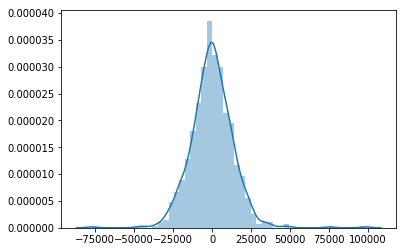

In [74]:
#Checking the VIF of the model
vif2 = pd.DataFrame()
vif2['Features'] = x_train.columns
vif2['vif'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif2['vif'] = round(vif2['vif'])
print(vif2)
#checking the predition of train dataset
y_train_pred = model1.predict(x_train)
#plottng the graph
res = y_train['SalePrice'] - y_train_pred
sns.distplot(res)

###### Feature selection using RFE

In [75]:
#Using RFE method to eleminate some features
linear = LinearRegression()
rfe = RFE(linear,60)
rfe = rfe.fit(x_train,y_train)

C:\Users\sumee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Note:- Here the point to be observed is that out of 185 coloumns I am choosing 60. This is not just a random number. Here before selecting 60 I have tried developing using different numbers and running the advance regression techineques and after multiple runs I choose 60 since it is giving me satifactry results. This is explained as proceed below.*

In [76]:
#Lisitng out the coloums that are selected by RFE
rfecols = x_train.columns[rfe.support_]
rfecols

Index(['LotFrontage', 'LotArea', 'Street', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Condition1_PosA', 'Condition1_RRAe', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Exterior2nd_Stone', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterCond_Fa', 'ExterCond_Po', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageT

###### Rigide regression

In [77]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500 ]}
ridge = Ridge()
# cross validation
folds = 5
ridgemodel = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)
ridgemodel.fit(x_train[rfecols], y_train['SalePrice']) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [78]:
#Lookig at the ridge results
ridge_results = pd.DataFrame(ridgemodel.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=200]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008274,0.000497,0.002806,0.002352,0.001,{'alpha': 0.001},-13367.683666,-13504.611394,-12101.818573,-13319.111991,-12323.127603,-12924.061348,587.708304,13,-11511.053196,-11322.596884,-11728.239292,-11044.941516,-11513.672676,-11424.100713,228.975488
1,0.004729,0.000621,0.000800,0.001600,0.01,{'alpha': 0.01},-13363.842801,-13493.472962,-12096.673105,-13303.866262,-12311.697935,-12914.704042,586.653102,12,-11512.225584,-11321.134689,-11727.573759,-11045.541704,-11517.529364,-11424.801020,229.127593
2,0.005121,0.002154,0.000199,0.000398,0.05,{'alpha': 0.05},-13347.659288,-13448.340549,-12075.167487,-13242.610296,-12269.031766,-12877.362312,582.061568,11,-11517.830798,-11322.962513,-11725.044693,-11048.235512,-11537.197179,-11430.254139,229.546370
3,0.005040,0.001534,0.001806,0.001842,0.1,{'alpha': 0.1},-13331.507998,-13398.828975,-12050.681692,-13219.493192,-12231.754765,-12847.263204,581.446042,10,-11524.626988,-11330.407652,-11725.326330,-11055.249560,-11560.211455,-11439.164397,229.374597
4,0.005980,0.002073,0.001993,0.001664,0.2,{'alpha': 0.2},-13301.983274,-13349.895680,-12012.606043,-13183.802234,-12182.784440,-12807.035718,583.456436,9,-11540.425818,-11350.209767,-11736.785437,-11078.093818,-11598.895709,-11460.882110,228.154704


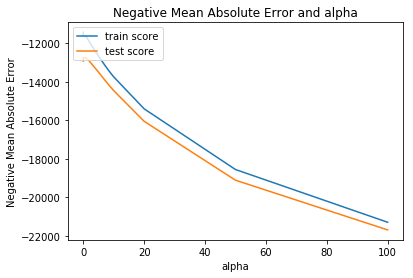

In [79]:
#Changing the type to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [80]:
#looking at the plot looks like alpha = 5 is correct
ridge = Ridge(alpha=5)
ridge.fit(x_train[rfecols], y_train['SalePrice'])
ridge.coef_

array([ 13459.98256107,  26483.63844991,  -9428.17637657, -12041.16995681,
        62309.99317283,  25240.61658746,  36215.66434454,  -9805.97647053,
        53255.89909615,  40420.19792243,  18254.3710409 ,  21462.60465096,
          865.67581733, -17647.32157858,  25129.4471396 ,  19396.79185046,
        35019.14558968,   8576.56679294,   1631.16475727,   7199.22492065,
         2818.40363613,  13292.82576727,   8790.35895238,  24950.93443681,
        -9629.84272146,  21279.83523668,   8218.08102628,  25512.99960027,
         5813.17199395, -10660.30782198,   1103.55944235,      0.        ,
            0.        ,   4882.87882499,   3375.74361905,    666.38279717,
        11482.24074777,  -1565.19880844,    948.08169989,   8317.22686113,
        13064.21660089,  -3623.76637942, -17540.28458407, -20593.2125165 ,
       -24743.60261057,   1558.26403792,      0.        ,  -3692.41094603,
       -23732.75384519, -11654.86256224, -22901.64527892,   7072.75505814,
         -644.66337789,  

In [81]:
#Predicting the y_train score
y_train_pred = ridge.predict(x_train[rfecols])
#printing the r2 score for train dataset
print('The R2 score for the model using Ridge Regression method on train dataset is :',r2_score(y_true=y_train,y_pred=y_train_pred))

The R2 score for the model using Ridge Regression method on train dataset is : 0.8942675264117287


In [82]:
#Predicting the values on test dataset
y_test_pred = ridge.predict(x_test[rfecols])
#printing the r2 score for test dataset
print('The R2 score for the model using Ridge Regression method on test dataset is "',r2_score(y_true=y_test,y_pred=y_test_pred))

The R2 score for the model using Ridge Regression method on test dataset is " 0.8794352144810698


###### Lasso Regression

In [83]:
#Using lasso regression
lasso = Lasso()
# cross validation
lasso_model = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)
lasso_model.fit(x_train[rfecols], y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sumee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sumee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sumee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sumee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [84]:
lasso_results = pd.DataFrame(lasso_model.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074691,0.035594,0.003864,0.000826,0.001,{'alpha': 0.001},-13368.101409,-13505.869878,-12102.387086,-13320.796243,-12324.423736,-12925.106042,587.824368,24,-11510.924941,-11322.756538,-11728.319478,-11044.873250,-11513.240154,-11424.022872,228.961754
1,0.053194,0.005664,0.003579,0.000792,0.01,{'alpha': 0.01},-13368.026270,-13505.627440,-12102.334308,-13320.538839,-12324.374451,-12924.970520,587.755176,23,-11510.963222,-11322.724133,-11728.309092,-11044.889825,-11513.311686,-11424.039592,228.964854
2,0.051749,0.008729,0.002516,0.002926,0.05,{'alpha': 0.05},-13367.692302,-13504.549897,-12102.099742,-13319.394821,-12324.159128,-12924.368928,587.446972,22,-11511.133360,-11322.580106,-11728.268316,-11044.963488,-11513.630147,-11424.115083,228.980174
3,0.049886,0.007265,0.003043,0.002229,0.1,{'alpha': 0.1},-13367.274815,-13503.203063,-12101.803441,-13317.964799,-12323.891485,-12923.616633,587.062483,21,-11511.346035,-11322.400067,-11728.223063,-11045.055567,-11514.028444,-11424.210635,229.001018
4,0.044905,0.010160,0.002411,0.001969,0.2,{'alpha': 0.2},-13366.439793,-13500.509113,-12101.208731,-13315.087027,-12323.355957,-12922.107956,586.292347,20,-11511.771389,-11322.039976,-11728.133031,-11045.240067,-11514.825002,-11424.401893,229.043238


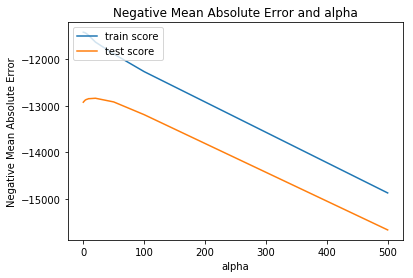

In [85]:
# changing the datatype to float
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')
# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
#Now looking at graph looks like alpha at 100 is good
lasso = Lasso(alpha=100)
lasso.fit(x_train[rfecols], y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
lasso.coef_

array([  9998.44857869,  29666.46482391,     -0.        , -10764.80946925,
        84339.07533827,  28605.92034795,  45053.61796358, -14854.88366688,
        66950.58516655,  46530.19543657,  14153.25078468,  16950.62800173,
           -0.        , -14974.05636091,  21097.00235652,  15034.71562641,
        32271.85103648,    525.55018076,     -0.        ,   3267.72028149,
           -0.        ,  13907.7350415 ,   1838.99321064,  26321.92319554,
        -8513.44477389,  20281.5469457 ,   6100.42872017,  26114.26470407,
            0.        ,  -6347.48754776,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,   -328.1291893 ,
         6726.18754405,      0.        ,      0.        ,  14163.1867098 ,
         8875.92618518,     -0.        , -16090.22923559, -22787.69920678,
       -24491.51406847,      0.        ,      0.        ,     -0.        ,
       -21213.7885943 , -11822.23567106, -21284.11042369,   4292.45322042,
           -0.        ,  

In [88]:
#Predicating the train data set
y_train_pred = lasso.predict(x_train[rfecols])
#print the r2 score for train dataset
print('The R2 score for train dataset using lasso regression is :',r2_score(y_true=y_train,y_pred=y_train_pred))

The R2 score for train dataset using lasso regression is : 0.8971346475508275


In [89]:
#Predcitng the test dataset
y_test_pred = lasso.predict(x_test[rfecols])
#Printing the R2 score for test dataset
print('The R2 score for test dataset using Lasso regerssion is :',r2_score(y_true=y_test,y_pred=y_test_pred))

The R2 score for test dataset using Lasso regerssion is : 0.8822653948195359


In [90]:
a = list(lasso.coef_)

In [91]:
#Code to see the features which have postive impact
print("================\n|Positive Impact|\n================")
for i in a:
    if i > 0:
        print(rfecols[a.index(i)],'--> ',round(i,2))

|Positive Impact|
LotFrontage -->  9998.45
LotArea -->  29666.46
OverallQual -->  84339.08
OverallCond -->  28605.92
YearBuilt -->  45053.62
TotalBsmtSF -->  66950.59
2ndFlrSF -->  46530.2
BsmtFullBath -->  14153.25
FullBath -->  16950.63
TotRmsAbvGrd -->  21097.0
Fireplaces -->  15034.72
GarageArea -->  32271.85
MSZoning_FV -->  525.55
MSZoning_RL -->  3267.72
Neighborhood_BrkSide -->  13907.74
Neighborhood_ClearCr -->  1838.99
Neighborhood_Crawfor -->  26321.92
Neighborhood_NoRidge -->  20281.55
Neighborhood_SWISU -->  6100.43
Neighborhood_StoneBr -->  26114.26
MasVnrType_Stone -->  6726.19
Foundation_Slab -->  14163.19
Foundation_Stone -->  8875.93
GarageType_Attchd -->  4292.45
GarageType_BuiltIn -->  7476.63
SaleCondition_Partial -->  16241.44


In [92]:
#Code to see which has negative impact
print("================\n|Negative Impact|\n================")
for i in a:
    if i < 0:
        print(rfecols[a.index(i)],'--> ',round(i,2))

|Negative Impact|
LandSlope -->  -10764.81
BsmtUnfSF -->  -14854.88
KitchenAbvGr -->  -14974.06
Neighborhood_NWAmes -->  -8513.44
Condition1_RRAe -->  -6347.49
MasVnrType_None -->  -328.13
BsmtQual_Fa -->  -16090.23
BsmtQual_Gd -->  -22787.7
BsmtQual_TA -->  -24491.51
KitchenQual_Fa -->  -21213.79
KitchenQual_Gd -->  -11822.24
KitchenQual_TA -->  -21284.11
SaleCondition_Family -->  -6449.97


### Conclusion

1. After using the lasso regression model as final model we have arrived at the final model
2. Final model on the test data has R2 score of 87%
3. Company should focus on following features since it is helping in improving the price 
    `LotFrontage`,`LotArea`,`OverallQual`,`OverallCond`,`YearBuilt`,`TotalBsmtSF`,`2ndFlrSF`,`BsmtFullBath`,`FullBath`,`TotRmsAbvGrd`,`Fireplaces`,`GarageArea`,`MSZoning`,`Neighborhood`,`MasVnrType`,`Foundation`,`BsmtExposure`,`GarageType`,`SaleCondi

